# Setup and Context

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

### The Data Source

Dr Semmelweis published his research in 1861. I found the scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).



### Upgrade plotly 

In [1]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats


### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Data

In [4]:

df_yearly = pd.read_csv('/Users/federicotrotta/Downloads/Dr+Semmelweis+Analysis+(start) 2/annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('/Users/federicotrotta/Downloads/Dr+Semmelweis+Analysis+(start) 2/monthly_deaths.csv',
                      parse_dates=['date'])

# Preliminary Data Exploration

* What is the shape of df_yearly and df_monthly? 
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

In [5]:
print(df_yearly.shape)
print(df_monthly.shape)

(12, 4)
(98, 3)


In [6]:
df_yearly.year


0     1841
1     1842
2     1843
3     1844
4     1845
5     1846
6     1841
7     1842
8     1843
9     1844
10    1845
11    1846
Name: year, dtype: int64

In [7]:
df_monthly.date

0    1841-01-01
1    1841-02-01
2    1841-03-01
3    1841-04-01
4    1841-05-01
        ...    
93   1848-11-01
94   1848-12-01
95   1849-01-01
96   1849-02-01
97   1849-03-01
Name: date, Length: 98, dtype: datetime64[ns]

### Check for Nan Values and Duplicates

In [8]:
df_yearly.duplicated().values.any()
df_monthly.duplicated().values.any()

False

In [9]:
df_yearly.isna().values.any()
df_monthly.isna().values.any()

False

### Descriptive Statistics

In [10]:
df_monthly

date  births  deaths
0  1841-01-01     254      37
1  1841-02-01     239      18
2  1841-03-01     277      12
3  1841-04-01     255       4
4  1841-05-01     255       2
..        ...     ...     ...
93 1848-11-01     310       9
94 1848-12-01     373       5
95 1849-01-01     403       9
96 1849-02-01     389      12
97 1849-03-01     406      20

[98 rows x 3 columns]

### Percentage of Women Dying in Childbirth

In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [11]:

percentage = (df_yearly.deaths.sum()/ df_yearly.births.sum()) * 100

print(f'The {percentage:.3}% of women die in 1840s ')

The 7.08% of women die in 1840s 


# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

### Monthly Data on Twin Axes

In [12]:
df_monthly

date  births  deaths
0  1841-01-01     254      37
1  1841-02-01     239      18
2  1841-03-01     277      12
3  1841-04-01     255       4
4  1841-05-01     255       2
..        ...     ...     ...
93 1848-11-01     310       9
94 1848-12-01     373       5
95 1849-01-01     403       9
96 1849-02-01     389      12
97 1849-03-01     406      20

[98 rows x 3 columns]

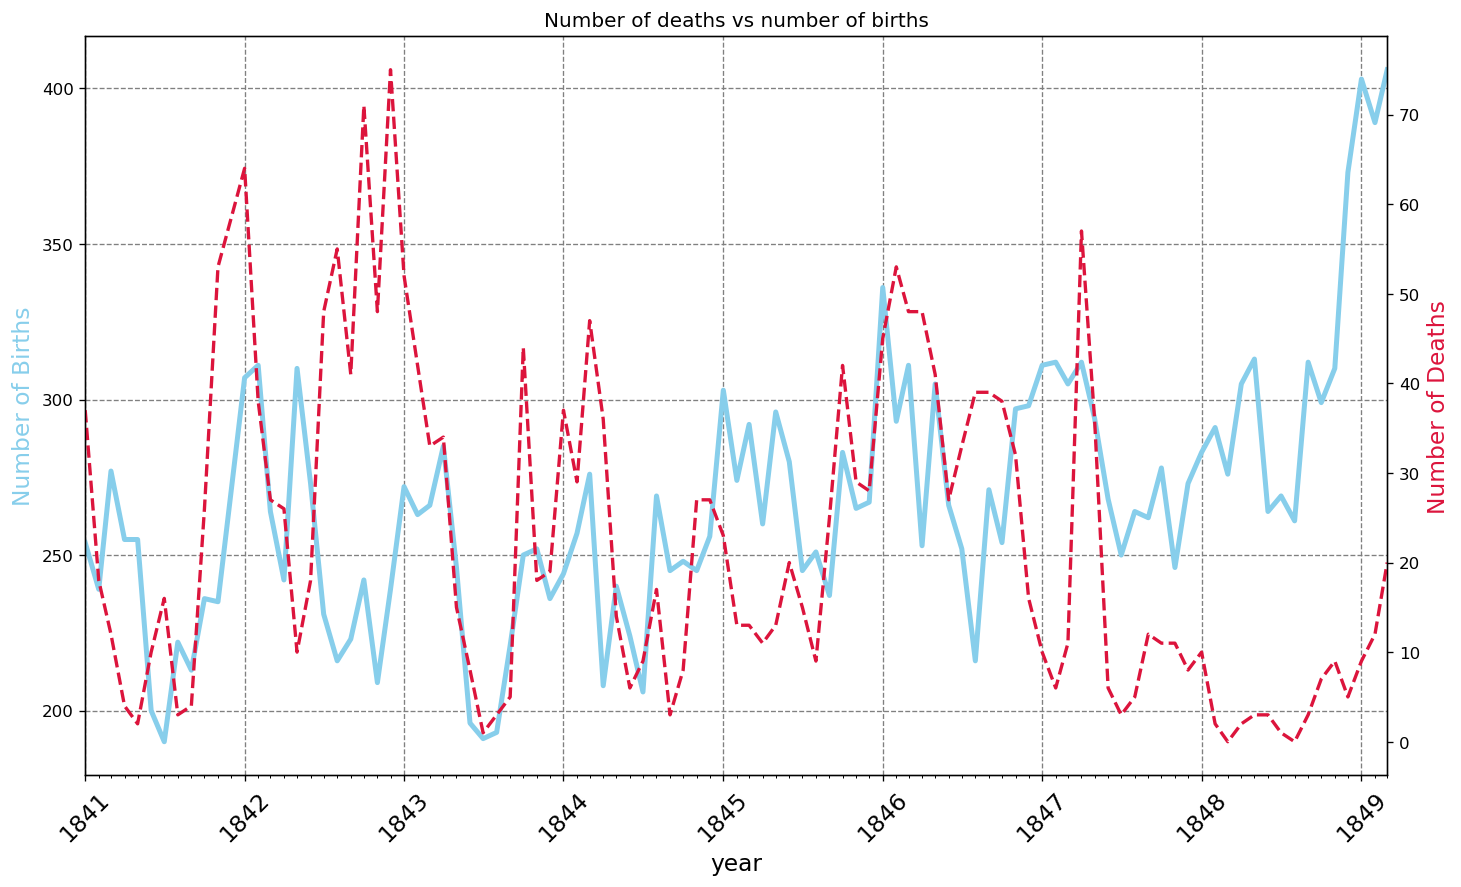

In [13]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

plt.figure(figsize=(14,8), dpi=120)
plt.xticks(fontsize=14, rotation=45)
plt.title('Number of deaths vs number of births')

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color='grey', linestyle='--')
ax1.set_xlim(df_monthly.date.min(), df_monthly.date.max())

ax1.set_xlabel('year', fontsize=14)
ax1.set_ylabel('Number of Births',  color='skyblue', fontsize=14)
ax2.set_ylabel('Number of Deaths', color='crimson', fontsize=14)

ax1.plot(df_monthly.date, df_monthly.births, color='skyblue', linewidth=3)
ax2.plot(df_monthly.date, df_monthly.deaths, color='crimson', linestyle='dashed', linewidth=2)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)



# The Yearly Data Split by Clinic

Now let's look at the annual data instead.
* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time?
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [43]:
df_yearly.groupby(['clinic']).sum().births

clinic
clinic 1    20042
clinic 2    17791
Name: births, dtype: int64

In [15]:
px.line(df_yearly,
    y='births',
    x='year',
    color='clinic'
)

In [16]:
px.line(df_yearly,
    y='deaths',
    x='year',
    color='clinic'
)

### Calculate the Proportion of Deaths at Each Clinic

Let's calculate the proportion of maternal deaths per clinic. That way we can compare like with like.
* Percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths".
* Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
* Which clinic has a higher proportion of deaths?

In [17]:
df_yearly.head(1)

year  births  deaths    clinic
0  1841    3036     237  clinic 1

In [45]:
df_yearly['pct_deaths'] = (df_yearly.deaths / df_yearly.births)*100
clinic_1=  df_yearly[df_yearly.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100
print(f'The average maternal death rate for clinic 1 is {avg_c1:.3}%')


The average maternal death rate for clinic 1 is 9.92%


In [47]:
clinic_2 = df_yearly[df_yearly.clinic == 'clinic 2']
avg_c2 = clinic_2.deaths.sum() / clinic_2.births.sum() * 100
print(f'The average maternal death rate for clinic 2 is {avg_c2:.3}%')

The average maternal death rate for clinic 2 is 3.88%


In [20]:
line =  px.line(df_yearly,
                x='year',
                y='pct_deaths',
                color='clinic')

line.show()

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [21]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

In [23]:
df_monthly['pct_deaths'] =(df_monthly.deaths /df_monthly.births)*100

In [24]:
before_handwash = df_monthly[df_monthly.date < handwashing_start]
after_handwash = df_monthly[df_monthly.date > handwashing_start]

In [49]:
avg_before = before_handwash.deaths.sum() / before_handwash.births.sum() * 100
avg_before

print(f'Average death rate prior to june 1947: {avg_before:.3}%')

Average death rate prior to june 1947: 10.5%


In [50]:
avg_after = after_handwash.deaths.sum() / after_handwash.births.sum() * 100

print(f'Average death rate after june 1947: {avg_after:.3}%')

Average death rate after june 1947: 2.15%


### Calculate a Rolling Average of the Death Rate

In [27]:
roll_df = before_handwash.set_index('date')
roll_df = roll_df.rolling(window=6).mean()

In [28]:
before_handwash

date  births  deaths  pct_deaths
0  1841-01-01     254      37       14.57
1  1841-02-01     239      18        7.53
2  1841-03-01     277      12        4.33
3  1841-04-01     255       4        1.57
4  1841-05-01     255       2        0.78
..        ...     ...     ...         ...
71 1847-01-01     311      10        3.22
72 1847-02-01     312       6        1.92
73 1847-03-01     305      11        3.61
74 1847-04-01     312      57       18.27
75 1847-05-01     294      36       12.24

[76 rows x 4 columns]

In [29]:
before_handwash

date  births  deaths  pct_deaths
0  1841-01-01     254      37       14.57
1  1841-02-01     239      18        7.53
2  1841-03-01     277      12        4.33
3  1841-04-01     255       4        1.57
4  1841-05-01     255       2        0.78
..        ...     ...     ...         ...
71 1847-01-01     311      10        3.22
72 1847-02-01     312       6        1.92
73 1847-03-01     305      11        3.61
74 1847-04-01     312      57       18.27
75 1847-05-01     294      36       12.24

[76 rows x 4 columns]

### Highlighting Subsections of a Line Chart
* Add 3 seperate lines to the plot: the death rate before handwashing, after handwashing, and the 6-month moving average before handwashing.
* Show the monthly death rate before handwashing as a thin dashed black line.
* Show the moving average as a thicker, crimon line.
* Show the rate after handwashing as a skyblue line with round markers.
* Look at the [code snippet in the documentation to see how you can add a legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) to the chart.

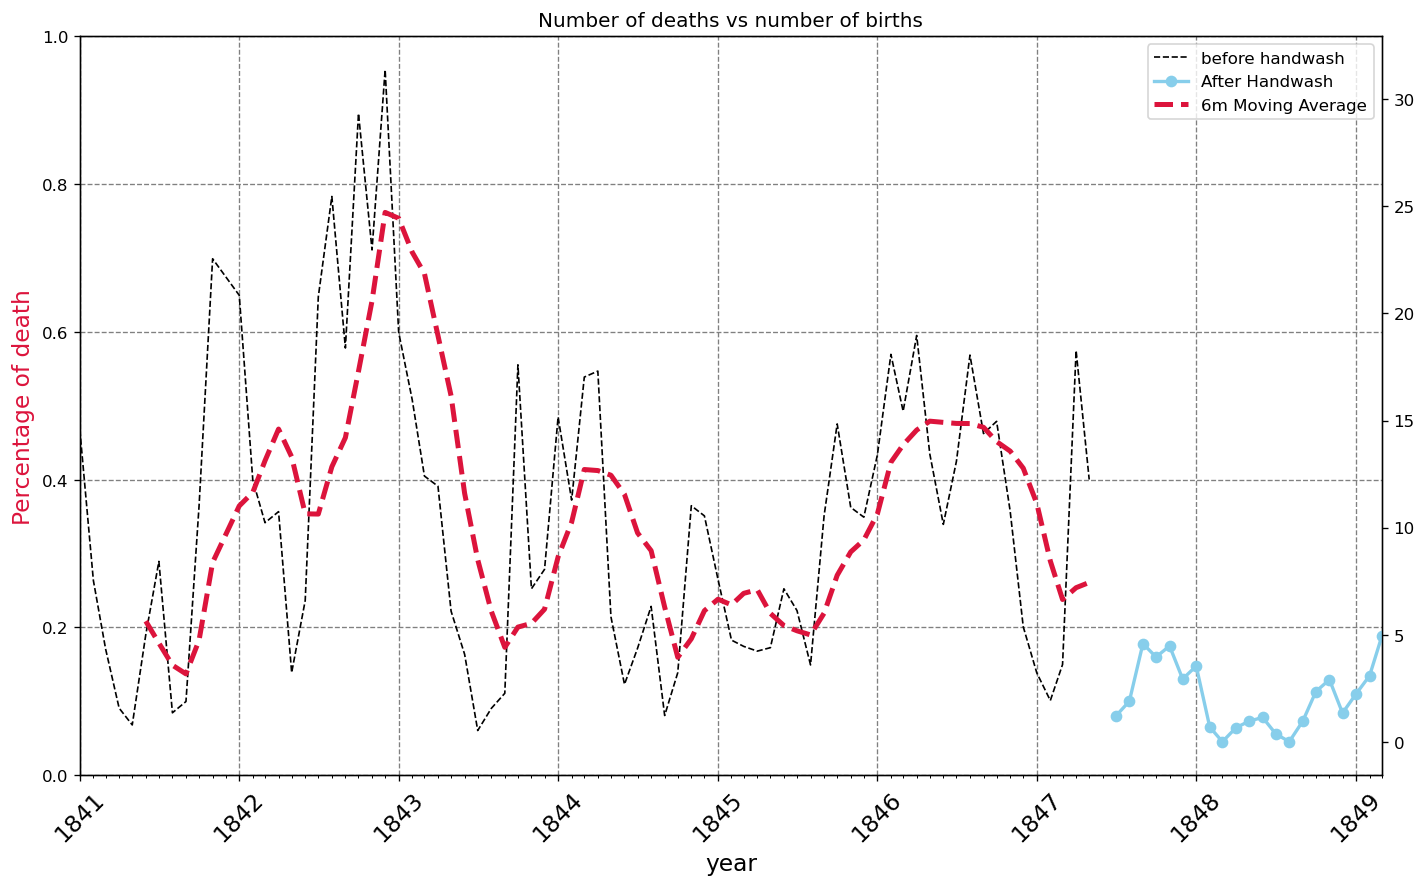

In [30]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')


plt.figure(figsize=(14,8), dpi=120)
plt.xticks(fontsize=14, rotation=45)
plt.title('Number of deaths vs number of births')


ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color='grey', linestyle='--')

ax1.set_xlim(df_monthly.date.min(), df_monthly.date.max())

ax1.set_xlabel('year', fontsize=14)
ax1.set_ylabel('Percentage of death',  color='crimson', fontsize=14)

plt.plot(before_handwash.date, before_handwash.pct_deaths, color='black', linewidth=1, linestyle='dashed')
plt.plot(after_handwash.date, after_handwash.pct_deaths, color='skyblue', linewidth=2, marker='o')
plt.plot(roll_df.index, roll_df.pct_deaths, color='crimson', linestyle='dashed', linewidth=3)


plt.legend(['before handwash', 'After Handwash', '6m Moving Average'])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)



### Statistics - Calculate the Difference in the Average Monthly Death Rate

* What was the average percentage of monthly deaths before handwashing?
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier?
* How many times lower are the chances of dying after handwashing compared to before?

In [31]:
avg_prob_bef = before_handwash.pct_deaths.mean()
avg_prob_aft = after_handwash.pct_deaths.mean()

print(f'Chance of death during childbirth before handwashing: {avg_prob_bef:.3}%.')
print(f'Chance of death during childbirth after handwashing: {avg_prob_aft:.3}%.')

Chance of death during childbirth before handwashing: 10.5%.
Chance of death during childbirth after handwashing: 2.1%.


### Box Plots to Show How the Death Rate Changed Before and After Handwashing



In [32]:
df_monthly['hand_washing'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')
df_monthly

date  births  deaths  pct_deaths hand_washing
0  1841-01-01     254      37       14.57           No
1  1841-02-01     239      18        7.53           No
2  1841-03-01     277      12        4.33           No
3  1841-04-01     255       4        1.57           No
4  1841-05-01     255       2        0.78           No
..        ...     ...     ...         ...          ...
93 1848-11-01     310       9        2.90          Yes
94 1848-12-01     373       5        1.34          Yes
95 1849-01-01     403       9        2.23          Yes
96 1849-02-01     389      12        3.08          Yes
97 1849-03-01     406      20        4.93          Yes

[98 rows x 5 columns]

In [33]:
box= px.box(y= df_monthly.pct_deaths,
              x= df_monthly.hand_washing,
              color=df_monthly.hand_washing)

box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',)
box.show()


### Let's Histograms to Visualise the Monthly Distribution of Outcomes

In [34]:
hist = px.histogram(
    df_monthly,
    x='pct_deaths',
    color='hand_washing',
    histnorm='percent',
    nbins=30,
    opacity=0.6,
    barmode='overlay',
    marginal='box'
)

hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)

hist.show()

### Kernel Density Estimate (KDE) to visualise a smooth distribution




/var/folders/bs/s9dyfb496w7272rs68dzw0nc0000gn/T/ipykernel_91764/3926779990.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/var/folders/bs/s9dyfb496w7272rs68dzw0nc0000gn/T/ipykernel_91764/3926779990.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




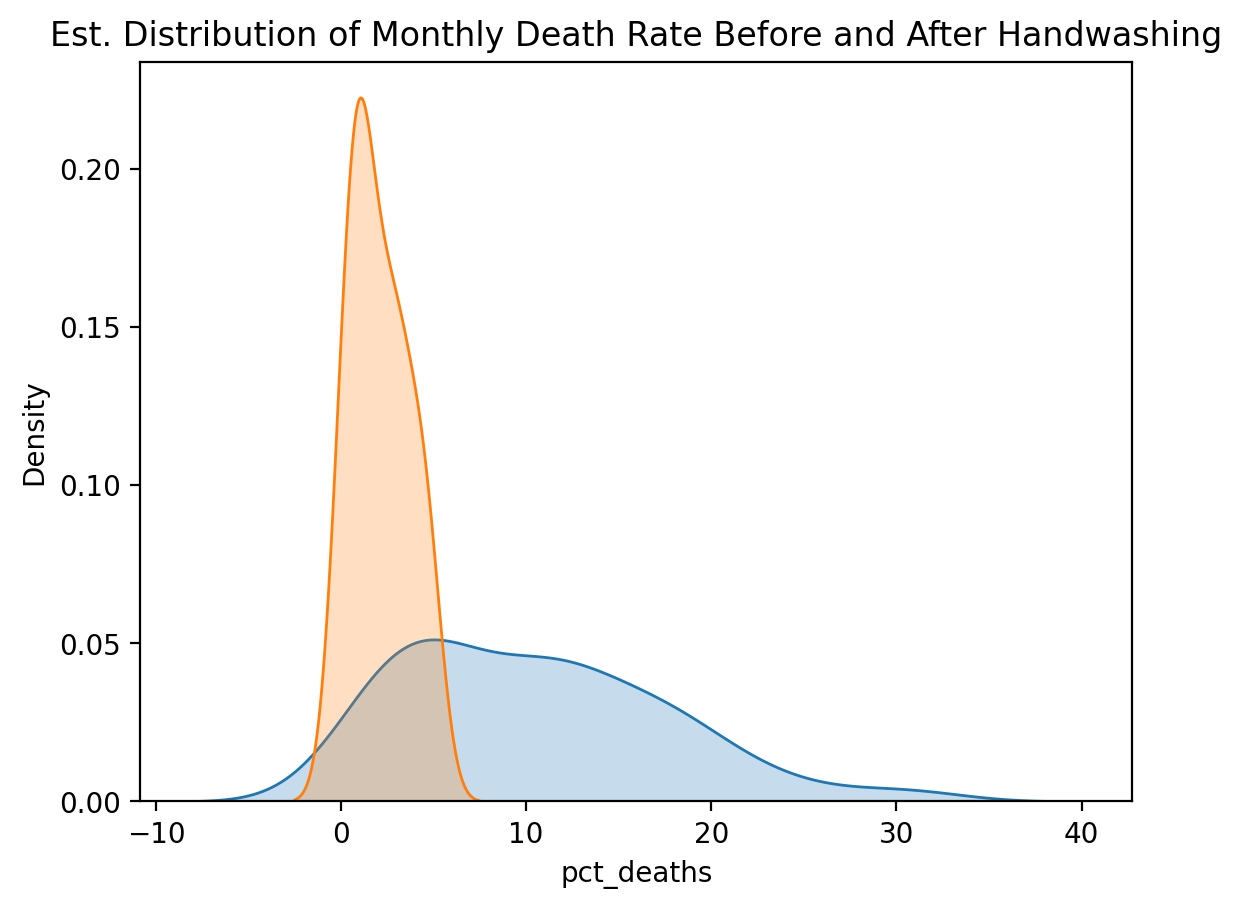

In [35]:
plt.figure(dpi=200)
sns.kdeplot(before_handwash.pct_deaths, shade=True)
sns.kdeplot(after_handwash.pct_deaths, shade=True)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')

plt.show()

### T-Test to Show Statistical Significance

In [36]:
t_statistic, p_value = stats.ttest_ind(before_handwash.pct_deaths, after_handwash.pct_deaths)


print(f'p-palue is {p_value:.10f}')
print(f'p-palue sin 0 {p_value:}')

print(f't-statstic is {t_statistic:.4}')

p-palue is 0.0000005157
p-palue sin 0 5.157285075361267e-07
t-statstic is 5.388
